# Using Python to analyse my Facebook Activity

I analyze my Facebook Activity from 2009 September upto 2020 September, a 11 year period.

This analyses seek to answer two questions:

1. How often do I post
2. Am I using Facebook more than I used to?

The data analysed is ony for posts I made and it excludes:

- Pictures and Videos shared.
- Comments
- Likes and Reactions
- Friends and Reactions
- Stories
- e.t.c




## Downloading Facebook Data

Facebook actually allows us to download pretty much everything we've ever done on the site. You can download your data here, but you may not want to download all of it — that file could be massive, depending on how often you use Facebook and how long you've been on it.

- To get just the data related to posts, go to the data download page. Change the requested file format from HTML to JSON, and then deselect everything from the options below, check off only posts, and hit Create File.

In [1]:
import pandas as pd

# read the json file into a dataframe
df = pd.read_json(r"C:\Users\cheml\Downloads\facebook-christianshiku\posts\your_posts_1.json")

df.head(3)

,timestamp,data,title,attachments,tags
0,2020-09-24 10:14:39,[{'post': 'Happy birthday Getty'}],Christian Shiku wrote on Gertrude Santungwana'...,NaN,NaN
1,2020-09-19 07:46:28,[{'post': 'Happy birthday Sthabile Ndlovu'}],Christian Shiku wrote on Sthabile Ndlovu's tim...,NaN,NaN
2,2020-09-05 06:11:31,[{'post': 'happy birthday bro'}],Christian Shiku wrote on Wlyam July's timeline.,NaN,NaN


In [2]:
# rename the timestamp column
df.rename(columns={'timestamp': 'date'}, inplace=True)

#drop some unnecessary columns
df = df.drop(['attachments', 'title', 'tags'], axis=1)

# making sure it's datetime format
pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2020-09-24 10:14:39,[{'post': 'Happy birthday Getty'}]
1,2020-09-19 07:46:28,[{'post': 'Happy birthday Sthabile Ndlovu'}]
2,2020-09-05 06:11:31,[{'post': 'happy birthday bro'}]


In [3]:
print(df.shape)
df.tail(3)

(665, 2)


,date,data
662,2009-09-29 14:34:34,[{'post': 'wonderful weather.....whose kiping ...
663,2009-09-24 09:18:17,"[{'post': 'well all around my soul gives away,..."
664,2009-09-21 11:14:33,[{'post': 'da most splendid achievement of all...


In the case of my personal Facebook data, it looks like I've posted over 665 times in total. My data begins back in late 2009, when I apparently posted something motivational about achievements. I was in University in 2009, so that timing checks out.

## Figuring Monthly Posts

Now that we've got our data, we need to get it into a format that tells us something about post frequency. Given that we're spanning years of history here, looking at it month-to-month makes the most sense. This means we need to group our 'date' column by months, and count how many rows (i.e., posts) are associated with each month.

Using Pandas we need to do two things:

1. Set the date column as the index of our DataFrame.
2. Resample the data by month, counting how many posts occur in each month.

For the first step, we can use set_index(). The second step is a bit more complex, so let's break it down into four separate steps to break down the code we need to write:

1. Select the column we want to resample by — in this case, is the data column.
2. Use the .resample() function with the argument 'MS' (for "Month Start") to resample our data by month.
3. Use .size() to specify what we want to measure each month — in this case, the number of rows (i.e., posts) with a post date that fall within that month.
4. Assign the resulting Series to a variable called post_counts.

In [4]:
df = df.set_index('date')
post_counts = df['data'].resample('MS').size()
post_counts

date
2009-09-01    3
2009-10-01    2
2009-11-01    1
2009-12-01    0
2010-01-01    0
             ..
2020-05-01    4
2020-06-01    5
2020-07-01    6
2020-08-01    3
2020-09-01    3
Freq: MS, Name: data, Length: 133, dtype: int64

That looks great! We've got our post counts broken down by month, and if we check the original data set, we can quickly see the counts are correct.

Note that months with no posts have been correctly counted as 0 rather than simply skipped. That's one of the reasons why using resample(), which is designed to work with time series, is better for this kind of task than using something like groupby(), where it's easy to skip months with no data if we're not careful.

## Visualizing my Facebook Usage

Anyway, now that we're past the tricky part, all that's left is the fun: visualization! To do that, we'll import matplotlib (and use the %matplotlib inline magic to make our chart appear in the Jupyter Notebook. We'll also import Seaborn and NumPy, which will help us make a more readable-looking chart.

Once we've done our imports, we'll use sns.set() to set the size and font size of our chart. Since we're working with a lot of data here, we'll make the chart fairly large and make sure the font size is big enough to be readable.

Then, we'll set the x labels to use the index of post_counts (the dates), and use sns.barplot() to create a bar chart. In the arguments for sns.barplot(), we'll tell the function to use the x labels we defined, to plot the data in post_counts, and to make the bar color blue.

That alone would be enough to create a basic chart, but in this case, we'll want to take a few additional steps to make the chart readable. Specifically, we'll want to arrange the tick positions on the x axis to once every 24 months, so that we see a tick every other year in the resultant chart. We'll also want to reformat the dates in the chart so that only the year is displayed.


In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

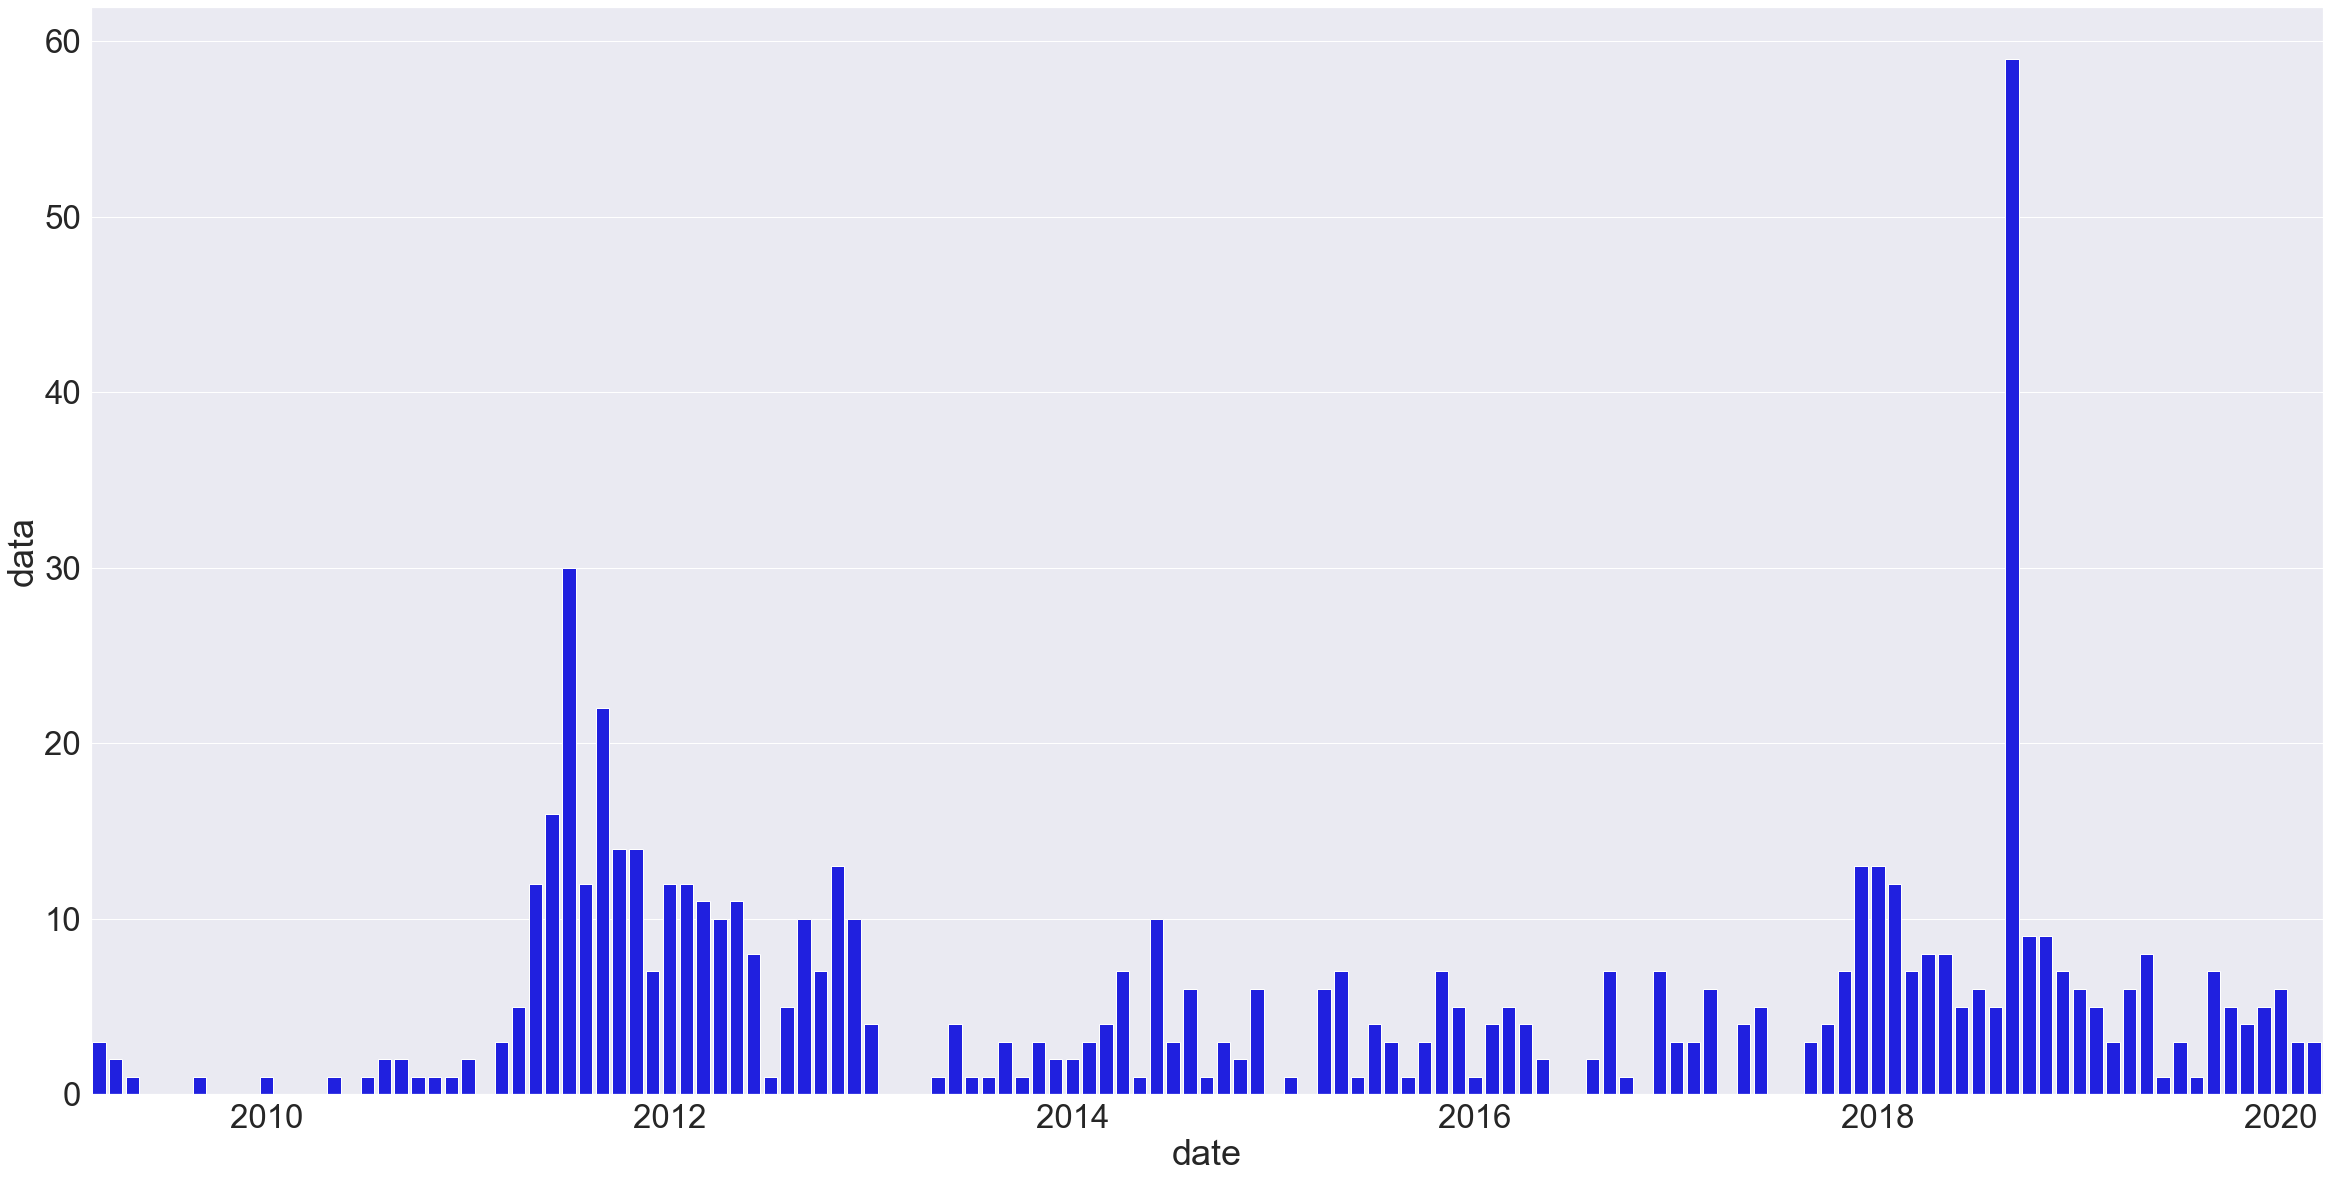

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

## Conclusion

In the chart above you can see that I am not a frequent user and I only posted rarely on my first days, only to have a peak in 2011 the year I graduated from University.

The year with the highest posts was in 2019 with a peak of 60 posts in a month.